Opcional:  Tente implementar os Exercícios 4 e 5 usando o conjunto de dados Properati_caba e faça um gráfico da relação entre os preços e a distância até o metrô.

,lon,lat,id,est,lin,geometry,distance_propriedade
20,-58.380715,-34.603637,21.0,C. PELLEGRINI,B,POINT (-58.38071 -34.60364),94.412827


94.41282745887435

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,geometry,min_distance_metro,price_usd
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,POINT (-58.50884 -34.66182),4728.393676,62000.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,POINT (-58.52298 -34.65226),6073.153602,72000.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,POINT (-58.44336 -34.55987),609.743234,138000.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,POINT (-58.44336 -34.55987),609.743234,195000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,POINT (-58.50162 -34.65236),3779.792274,239000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0,POINT (-58.40252 -34.59921),141.068508,165000.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0,POINT (-58.39737 -34.58743),17.578792,165000.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,POINT (-58.44268 -34.56369),430.624480,410000.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,POINT (-58.44268 -34.56369),430.624480,410000.0


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,geometry,min_distance_metro,price_usd,min_distance_km
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,POINT (-58.50884 -34.66182),4728.393676,62000.0,4.728394
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,POINT (-58.52298 -34.65226),6073.153602,72000.0,6.073154
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,POINT (-58.44336 -34.55987),609.743234,138000.0,0.609743
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,POINT (-58.44336 -34.55987),609.743234,195000.0,0.609743
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,POINT (-58.50162 -34.65236),3779.792274,239000.0,3.779792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0,POINT (-58.40252 -34.59921),141.068508,165000.0,0.141069
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0,POINT (-58.39737 -34.58743),17.578792,165000.0,0.017579
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,POINT (-58.44268 -34.56369),430.624480,410000.0,0.430624
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0,POINT (-58.44268 -34.56369),430.624480,410000.0,0.430624


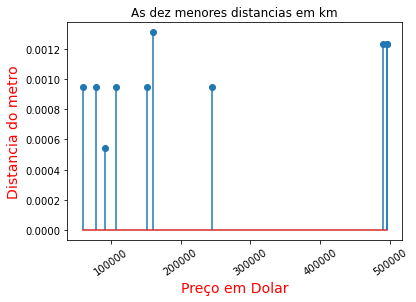

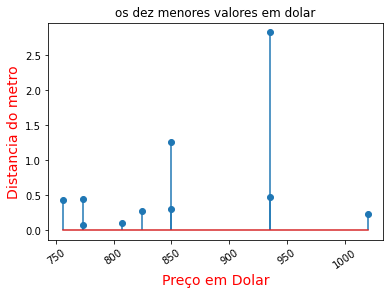

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import shapely 
import geopy.distance

#função para calculo de distancia
def distance_min(point_propriedade, geo_dataframe):
    for i in geo_dataframe.index:
        geo_dataframe.loc[i, 'distance_propriedade'] = geopy.distance.geodesic(point_propriedade,
                  (geo_dataframe.loc[i,'geometry'].x
                  ,geo_dataframe.loc[i,'geometry'].y)).meters
    return geo_dataframe['distance_propriedade'].min()
	
#importando dados para questão 4 e 5	
data_location = "metro-BA.csv"

df_subte = pd.read_csv(data_location, sep = ',')

data_location_prop = "Real_State_Properati.csv"

df_prop = pd.read_csv(data_location_prop, 
                      sep = '\t' 
                     )

geo_subte = gpd.GeoDataFrame(df_subte, 
                             geometry = gpd.points_from_xy(df_subte['lon'], 
                                                           df_subte['lat']
                                                          )
                            )

geo_prop = gpd.GeoDataFrame(df_prop, 
                             geometry = gpd.points_from_xy(df_prop.lon, 
                                                          df_prop.lat
                                                         )
     
                            )
#distancia para uma propriedade especifica, no caso o obelisco
#lat:-34.603851, lon: -58.381775 obelisco
point_propriedade = (-58.381555,-34.603851)


min_distance_value = distance_min(point_propriedade, geo_subte)  
    
#min_distance = geo_subte.sort_values(by = "distance_propriedade").head(1)
min_distance = geo_subte[geo_subte['distance_propriedade'] == geo_subte['distance_propriedade'].min()]
display(min_distance)
display(min_distance_value)

#distancia para varias propriedades
for i in geo_prop.index:
    point_propriedade_n = (geo_prop.loc[i, 'lon'],geo_prop.loc[i, 'lat'])    
    geo_prop.loc[i, 'min_distance_metro'] = distance_min(point_propriedade_n, geo_subte)
	
#ordernar valores
geo_prop.sort_values(by = "min_distance_metro")
#padronizar preço em dolar
geo_prop['price_usd']= geo_prop.apply(lambda x: x.price * 0.0085 if x.currency!='USD' else x.price,axis=1)
display(geo_prop)
#padronizar distancia em km
geo_prop['min_distance_km']= geo_prop.apply(lambda x: x.min_distance_metro /1000,axis=1)
display(geo_prop)

#grafico em relação a distancia
plt.title('As dez menores distancias em km')
plt.xlabel('Preço em Dolar', fontsize=14, color='red')
plt.ylabel('Distancia do metro', fontsize=14, color='red')
geo_prop_menor_distancia = geo_prop.sort_values(by = "min_distance_km").head(10)
geo_prop_menor_valor = geo_prop.sort_values(by = "price_usd").head(10)
plt.stem(geo_prop_menor_distancia['price_usd'],geo_prop_menor_distancia['min_distance_km'])
plt.xticks(rotation = 35)
plt.show()

#grafico em relação aos valores em dolar
plt.title('os dez menores valores em dolar')
plt.xlabel('Preço em Dolar', fontsize=14, color='red')
plt.ylabel('Distancia do metro', fontsize=14, color='red')
plt.stem(geo_prop_menor_valor['price_usd'],geo_prop_menor_valor['min_distance_km'])
plt.xticks(rotation = 35)
plt.show()